# Parte 9
Sperimentazione numerica relativa ll'interpolazione di dati e funzioni.

## Interpolante di Lagrange
Calcola il polinomio di interpolazione in forma di Lagrange

    yy = interpLagrange(x, y, xx)

Input: 
- `x`:  vettore dei nodi di interpolazione, con elementi distinti
- `y`:  vettore dei valori assunti dalla funzione nei nodi di interpolazione,
- `xx`: vettore dei punti in cui si vuole valutare il polinomio interpolante.

Output:
- `yy`:  vettore contenente i valori assunti dal polinomio interpolante,

In [1]:
function [yy] = interpPolLagrange(x, y, xx)

n = length(x);

for j = 1:n
    % calcolo coefficienti j-esimo polinomio fondamentale di Lagrange
    x_zeri = [x(1:j-1) x(j+1:end)];
    p = poly(x_zeri);
    p = p / polyval(p, x(j));
    % calcolo valori assunti dal polinomio
    L(j,:) = polyval(p, xx);
end

yy = y * L;

end

## Interpolante di Newton

Calcola il polinomio di interpolazione in forma di Newton. Per la valutazione del polinomio si impiega l'algoritmo di Horner.

    yy = interpNewton(x, y, xx)

Input: 
- `x`:  vettore dei nodi di interpolazione con elementi distinti
- `y`:  vettore dei valori assunti dalla funzione nei nodi di interpolazione,
- `xx`: vettore dei punti in cui si vuole valutare il polinomio interpolante.

Output:
- `yy`:  vettore contenente i valori assunti dal polinomio interpolante,

In [2]:
function [yy] = interpPolNewton(x, y, xx)

% FASE 1 creazione della tabella delle differenze divise
% Calcolo dei coefficienti del polinomio di Newton

n = length(x);
%for k = 2 : n % si calcolano n - 1 colonne (una per coeff.)
 %   y(k:n) = (y(k:n) - y(k-1:n-1))./(x(k:n) - x(1:n-k+1));
%end
for k = 1 : n-1
    y(k+1:n) = (y(k+1:n) - y(k)) ./ (x(k+1:n) - x(k));
end

coeff = y; % diagonale della tabella delle differenze divise.

% si ottiene il vettore dei coefficienti per cui vale p(x(i)) = y(i)
% dove p(x) = c(1) + c(2)(x - x(1)) + ... + c(n)(x - x(1))...(x - x(n - 1))

% FASE 2 applicazione algoritmo di Horner
% Calcolo dei valori del polinomio di Newton nel vettore y.

n = length(coeff);
yy = coeff(n) * ones(size(xx)); 

for k = n - 1: -1 : 1
    yy =  (xx - x(k)).*yy + coeff(k);
end


% Si ottiene yy(i) = p(xx(i))
% dove p(x) = c(1) + c(2)(x - x(1)) + ... + c(n)(x - x(1))...(x - x(n - 1))

end

## Esercizio 1

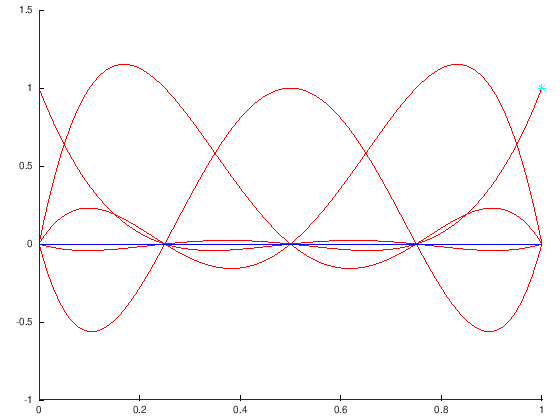

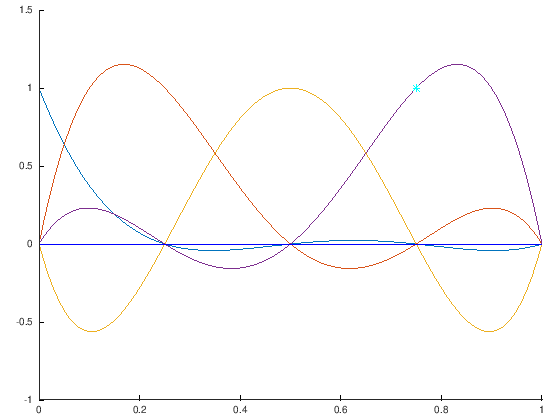

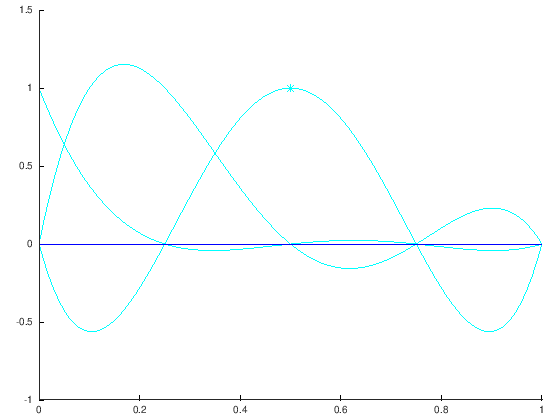

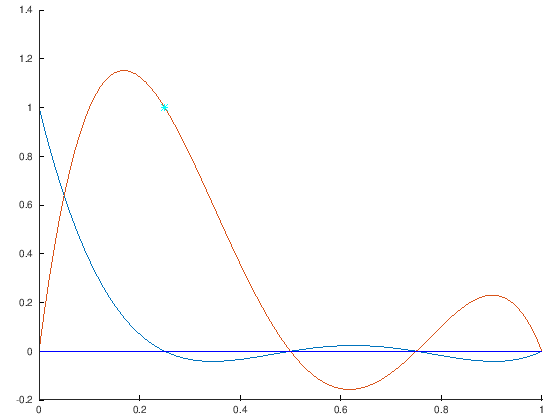

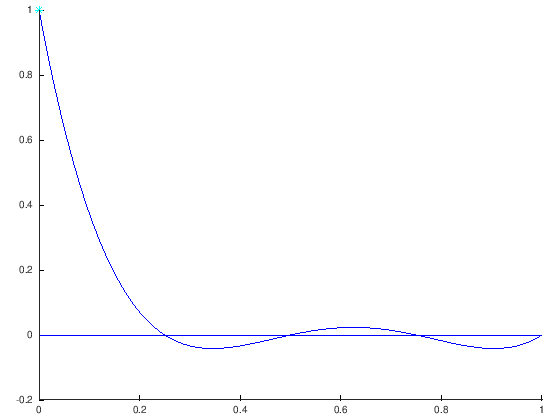

In [3]:
x = [0, 1/4, 1/2, 3/4, 1];
%x = [-1 -0.7 0.5 2];
y = [];

xx = linspace(min(x), max(x));
cols = ['b-', 'c-', 'r-', 'g-', 'r-'];

n = length(x);

for j = 1:n
    % calcolo coefficienti j-esimo polinomio fondamentale di Lagrange
    x_zeri = [x(1:j-1) x(j+1:end)];
    p = poly(x_zeri);
    p = p / polyval(p, x(j));
    % calcolo valori assunti dal j-esimo polinomio
    L(j,:) = polyval(p, xx);
    % rappresentazione grafica
    figure(j)
    hold on
    plot(xx, L,cols(j))
    plot(x, zeros(1,n), 'b-')
    plot(x(j), 1, 'c*')
end

## Esercizio 2

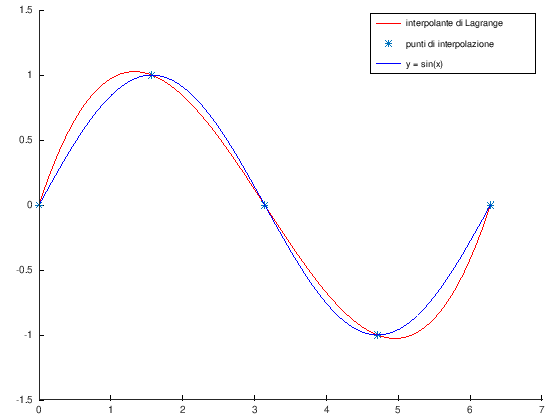

In [4]:
for k = 0:4
    x(k + 1) = (k * pi) / 2;
    y(k + 1) = sin(x(k + 1));
end

xx = linspace(min(x), max(x));
yy = interpPolLagrange(x, y, xx);
figure(1)
plot(xx, yy, "r-", x, y, '*', xx, sin(xx), 'b-')
legend("interpolante di Lagrange","punti di interpolazione", "y = sin(x)");
box off

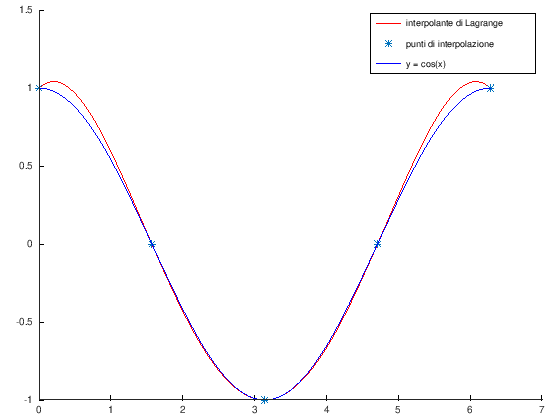

In [5]:
for k = 0:4
    x(k + 1) = (k * pi) / 2;
    y(k + 1) = cos(x(k + 1));
end

xx = linspace(min(x), max(x));
yy = interpPolLagrange(x, y, xx);
figure(2)
plot(xx, yy, "r-", x, y, '*', xx, cos(xx), 'b-')
legend("interpolante di Lagrange","punti di interpolazione", "y = cos(x)");
box off

## Esercizio 3

error: element number 2 undefined in return list
error: 'yy1' undefined near line 1 column 10
error: 'yy2' undefined near line 1 column 11
    legend at line 478 column 13


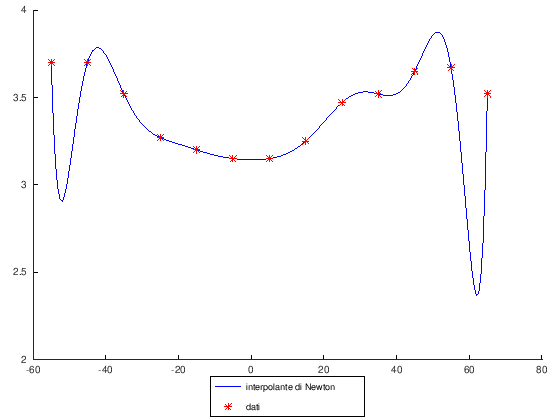

In [6]:
x = [-55 -45 -35 -25 -15 -5 5 15 25 35 45 55 65];
y = [3.7 3.7 3.52 3.27 3.2 3.15 3.15 3.25 3.47 3.52 3.65 3.67 3.52];

xx = linspace(min(x), max(x), 200);
figure(3)
hold on
[yy, yy1, yy2] = interpPolNewton(x, y, xx);
plot(xx, yy, 'b');
plot(x, y, 'r*'); % dati sperimentali
plot(42, yy1, 'go'); % stima L = 42°
plot(-42, yy2, 'ro'); % stima L = -42°
legend("interpolante di Newton", "dati", "stima L = 42°", "stima L = -42°", ...
    "location", "southoutside")

## Esercizio 4

In questo esercizio si sfrutta l'interpolazione non per dedurre dati sperimentali ma per approssimare funzioni. I dati sperimentali x e y a partire dai quali calcolare l'interpolazione vanno introdotti dall'utente. Il grado normalmente è pari al numero di punti forniti meno uno ma in questo caso l'utente può scegliere anche il grado (per studiare la variazione della norma della funzione resto).

1. Scegli il grado: troppo basso o troppo alto e l'approssimazione non sarà buona


 grado: 3


2. Indica l'intervallo [a,b] entro cui estrarre i nodi di interpolazione:


 a: 2
 b: 1


3. Definisci la strategia di calcolo dei nodi di interpolazione 
 [1] Equispaziati 
 [2] Chebyshev


 strategia: 2


4. Scegli la funzione da interpolare 
 [1] sin(x) - 2sin(2x) 
 [2] sinh(x) 
 [3] |x| 
 [4] 1 / (1 + x^2)


 funzione: 1


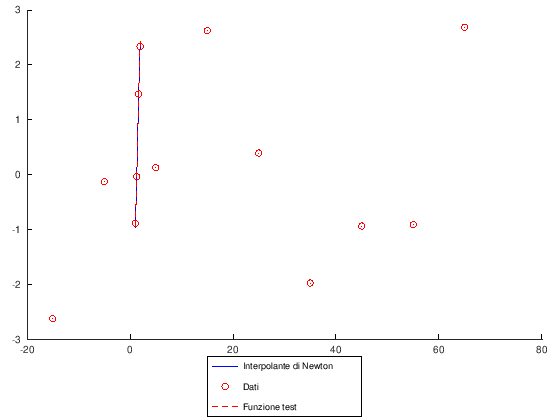

In [7]:
text = ["1. Scegli il grado: troppo basso o troppo alto" ...
    " e l'approssimazione non sarà buona"];
disp(text);
n = input(" grado: ");

text = ["2. Indica l'intervallo [a,b] entro cui estrarre" ... 
    " i nodi di interpolazione:"];
disp(text);
a = input(" a: ");
b = input(" b: ");

text = ["3. Definisci la strategia di calcolo dei nodi di" ... 
    " interpolazione \n [1] Equispaziati \n [2] Chebyshev"];

disp(text);
scelta = input(" strategia: ");
switch scelta
    case 1 % equispaziati
        x = linspace(a, b, n + 1);
    case 2 % Chebyshev
        for i = 1 : n + 1
            x(i) = (a + b)/2 + (b - a)/2 * cos(((2*i - 1)) ...
                * pi / ((2 * (n + 1))));
        end
    otherwise
        close all
        return
end

text = ["4. Scegli la funzione da interpolare \n" ...
    " [1] sin(x) - 2sin(2x) \n [2] sinh(x) \n" ... 
    " [3] |x| \n [4] 1 / (1 + x^2)"];
disp(text);
scelta = input(" funzione: ");

xx = linspace(a, b, 301);
switch scelta
    case 1
        f = sin(xx) - 2 * sin(2 * xx); y = sin(x) - 2 * sin(2 * x);
    case 2
        f = sinh(xx); y = sinh(x); 
    case 3
        f = abs(xx); y = abs(x); 
    case 4
        f = 1 ./ (1 + xx.^2); y = 1 ./ (1 + x.^2);
    otherwise
      close all
      return
end


yy = interpPolNewton(x, y, xx);

figure(1)
plot(xx, yy, "b-", x, y, "ro", xx, f, "r--");
legend("Interpolante di Newton", "Dati", "Funzione test", ...
    "location", "southoutside");
box off

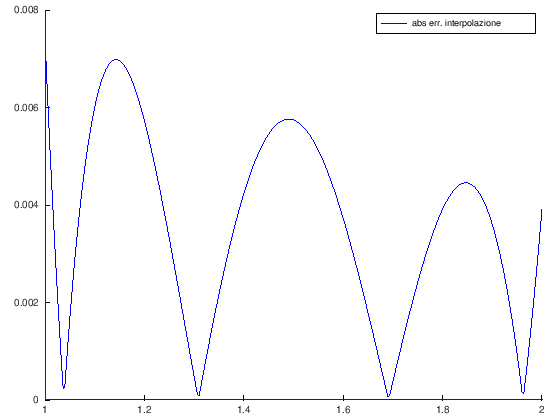

In [8]:
f_resto = abs(f - yy);
figure(2);
plot(xx, f_resto, "b-");
legend("abs err. interpolazione")
box off

In [9]:
norm_inf = max(f_resto)

norm_inf =  0.0074406


## Esercizio 5

In [10]:
clc

a = -1; 
b = 1; 
spacing = 200;
xx = linspace(a, b, spacing);

LLe = zeros(1,4);
LLc = zeros(1,4);

i=0;

for n = 5:5:20  
    i = i + 1;
    
    xe = linspace(a, b, n + 1);
    xc = cos(((2*[0:n] + 1)) * pi / ((2 * (n + 1))));
    
    Le = zeros(1, spacing);
    Lc = zeros(1, spacing);
    
    for j = 1 : n + 1
        x_zeri = [xe(1:j-1) xe(j+1:end)];
        p = poly(x_zeri);
        pe = p / polyval(p, xe(j));
    
        Le = Le + abs(polyval(pe, xx));
        
        x_zeri = [xc(1:j-1) xc(j+1:end)];
        p = poly(x_zeri);
        pc = p / polyval(p, xc(j));
        
        Lc = Lc + abs(polyval(pc, xx));
    end
    
    LLe(i) = max(Le);
    LLc(i) = max(Lc);
end

LLe
LLc

LLe =

       3.10494      29.89431     508.71131   10759.64903

LLc =

   2.1044   2.4894   2.7278   2.9008



Si nota come la costante di Lebesque assuma valori notevolmente più grandi quando si impiegano nodi equispaziati mentre quando si utilizzano i nodi di Chebyshev la costante risulta molto vicina all'unità. Si deduce che con il set di dati fornito l'indice di condizionamento è particolarmente elevato nel caso della scelta di nodi equispaziati. Qualsiasi algoritmo si scelga di impiegare, sarà difficile ottenere delle soluzioni accurate.

## TODO - Esercizio 6

In [16]:
clc
clearvars
a = -1; b = 1;
x = linspace(a, b, 22);

xx = linspace(min(x), max(x), 301);
f = @(z) sin(2 * pi * z);

yy_es = f(xx);

y = f(x);
yy = interpPolLagrange(x, y, xx);

y_t = y + 0.0002 * randn(1, 22);
yy_t = interpPolLagrange(x, y_t, xx);

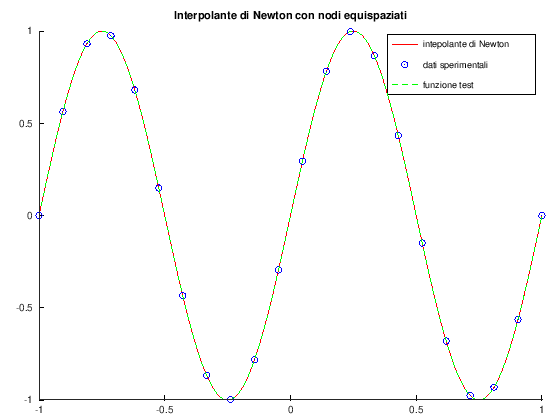

In [17]:
figure
plot( xx, yy, "r-", ...
      x, y, "bo", ...
      xx, yy_es, "g--")
title("Interpolante di Newton con nodi equispaziati")
legend("intepolante di Newton", "dati sperimentali", "funzione test")
box off

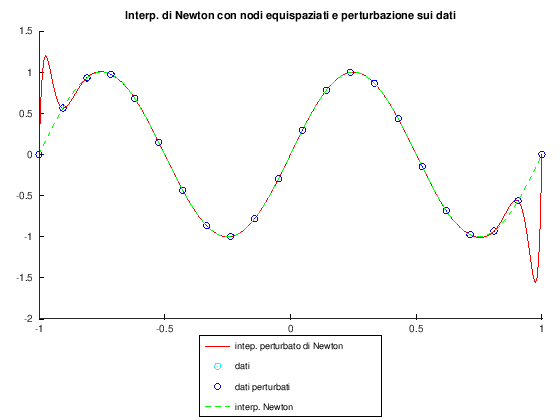

In [18]:
figure
plot( xx, yy_t, "r-", ...
      x, y, "co", ...
      x, y_t, "bo", ...
      xx, yy, "g--");
title("Interp. di Newton con nodi equispaziati e perturbazione sui dati")
legend("intep. perturbato di Newton", "dati", ...
    "dati perturbati", "interp. Newton", "location", "southoutside")
box off

Con il set di dati perturbato si verifica il **fenomeno di Runge**.

In [19]:
err_rel_dati = norm(y_t - y, inf) / norm(y, inf)

err_rel_dati =  0.00050007


In [20]:
err_rel_ris = norm(yy_t - yy, inf) / norm(yy, inf)

err_rel_ris =  1.3928


# TODO - Esercizio 7

error: 'xx' undefined near line 23 column 27
error: called from
    interpPolNewton at line 23 column 4
error: 'c' undefined near line 1 column 14
error: 'xx' undefined near line 23 column 27
error: called from
    interpPolNewton at line 23 column 4
error: 'c_t' undefined near line 1 column 16
error: __plt2vv__: vector lengths must match
error: called from
    __plt__>__plt2vv__ at line 482 column 5
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    plot at line 223 column 10


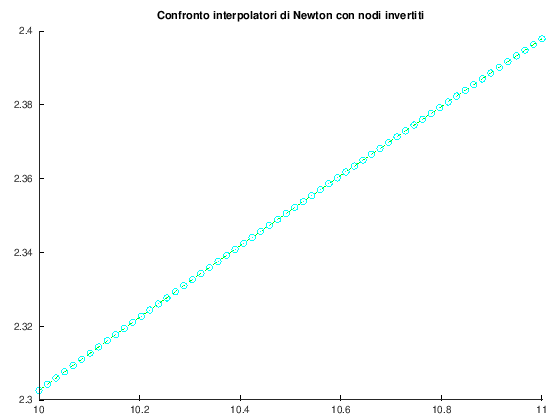

In [22]:
clc


x = linspace(10,11,60);
y = log(x);

x_t = fliplr(x);
y_t = log(x_t);

xx = linspace(10, 11, 1000);
f = log(xx);
c = interpPolNewton(x, y);
yy = HornerN(c, x, xx);
c_t = interpPolNewton(x_t, y_t);
yy_t = HornerN(c_t, x_t, xx);
%yy_t = interpNewton(x_t, y_t, xx);

figure
plot( xx, f, "g--", ...
      x, y, "co", ...
      xx, yy, "b-", ...
      xx, yy_t, "r--");
title("Confronto interpolatori di Newton con nodi invertiti");
box off

In [ ]:
err_ass = abs(f - yy);
err_ass_t = abs(f - yy_t);

figure
semilogy(xx, err_ass, "r.-")